imported required libs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read data

In [4]:
data = pd.read_excel("DailyActivities (1).xlsx")
data.head(5)

function for plotting

In [12]:
category_names = data["Area of Interest"]
results = {
    'Charles': data["Charles"],
    'Henry': data["Henry"],
    'Susan': data["Susan"]
    
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
    plt.ylabel("Names")
    plt.xlabel("24 Hours")
    return fig, ax


survey(results, category_names)

plt.savefig("test.png",facecolor='white', transparent=False)
plt.show()

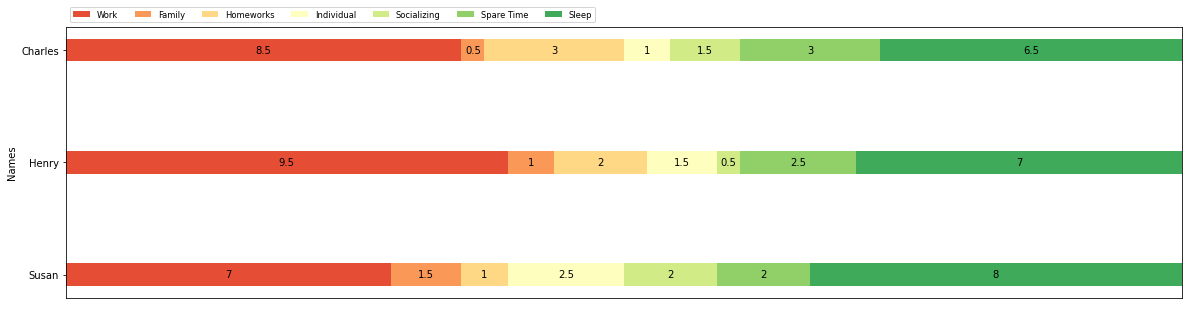

In [13]:
survey(results, category_names)

plt.savefig("test.png",facecolor='white', transparent=False)
plt.show()